dataset :  https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation

In [109]:
import pandas as pd

In [110]:
dataset = pd.read_csv("Mall_Customers.csv")

In [111]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [113]:
df = dataset.drop('CustomerID', axis=1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
features = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [114]:
features.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [115]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

features_st = minmax.fit_transform(features)

features_st = pd.DataFrame(features_st, columns=features.columns)


In [116]:
features_st.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [117]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


ELBOW POINT

In [118]:
inertia = [] 

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_st)
    inertia.append(kmeans.inertia_)

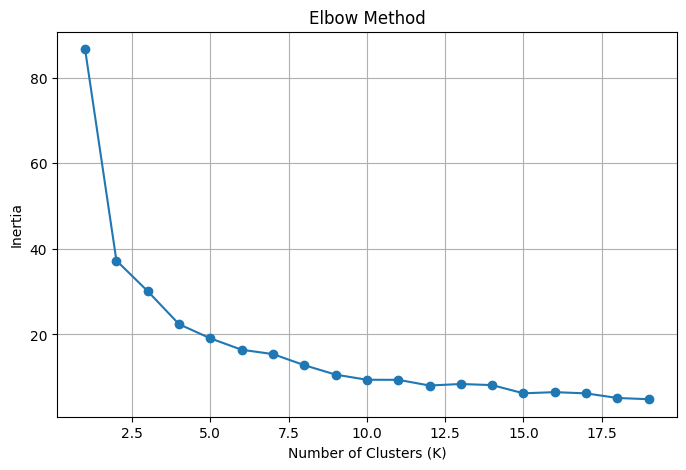

In [119]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


چون 18 نسبت به اندازه دیتاست (200 نفر) عدد بالایی محسوب می‌شه، الان لازمه با روش دوم: Silhouette Score بررسی کنیم که واقعاً خوشه‌بندی با 18 خوشه کیفیت خوبی داره یا نه.

Silhouette Score

In [120]:
from sklearn.metrics import silhouette_score

In [121]:
silhouette_scores = []

for k in range(2, 18):  
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(features_st)
    score = silhouette_score(features_st, labels)
    silhouette_scores.append(score)


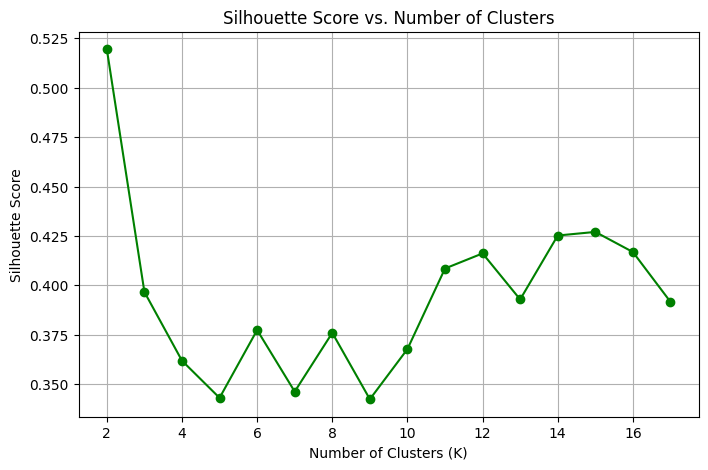

In [122]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 18), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


K=2 → بالاترین امتیاز → خوشه‌بندی ساده ولی خیلی واضح

K=6 → امتیاز نسبتاً خوب → شاید تفکیک دقیق‌تر با جزئیات بیشتر

K=13 → نسبتاً بالا → خوشه‌بندی پیچیده‌تر

In [58]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features_st)


In [59]:
df['Cluster'] = clusters


In [60]:
print(df.head())


   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      0   19                  15                      39        1
1      0   21                  15                      81        1
2      1   20                  16                       6        0
3      1   23                  16                      77        0
4      1   31                  17                      40        0


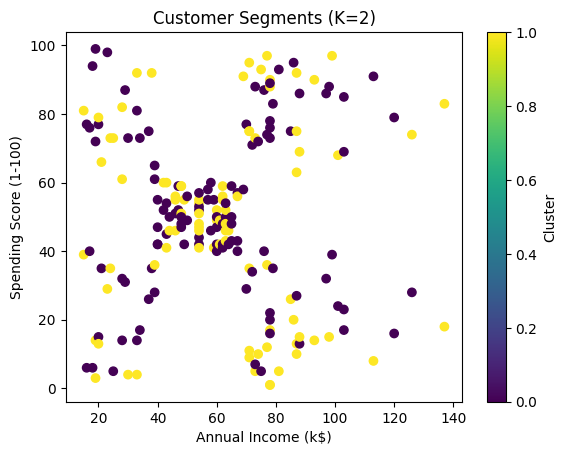

In [61]:

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K=2)')
plt.colorbar(label='Cluster')
plt.show()



In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

features_pca = pca.fit_transform(features_st)


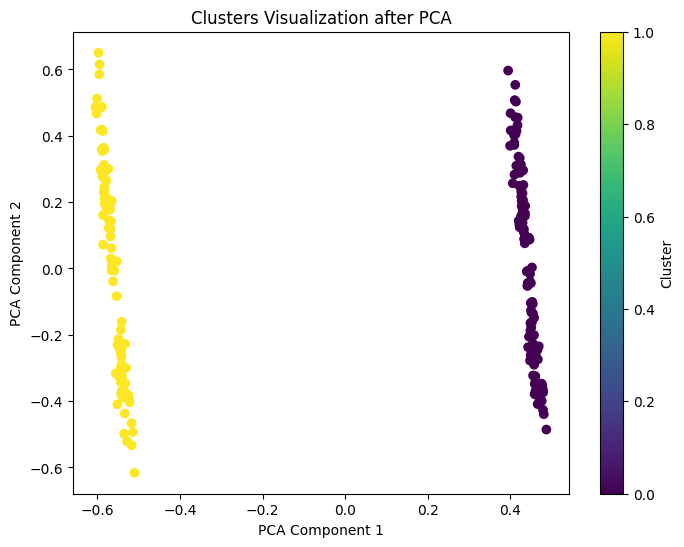

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization after PCA')
plt.colorbar(label='Cluster')
plt.show()

In [65]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


print("GENRE  :   ",{'Male': 0, 'Female': 1})

         Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0          1.0  38.098214           59.250000               51.526786
1          0.0  39.806818           62.227273               48.511364
GENRE  :    {'Male': 0, 'Female': 1}


DB SCAN

In [124]:
from sklearn.cluster import DBSCAN


In [125]:
features_st.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [158]:
dbscan = DBSCAN(eps=0.25, min_samples=4)
clusters_db = dbscan.fit_predict(features_st)
df['DBSCAN_Cluster'] = clusters_db

In [159]:
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 1    111
 0     79
-1      6
 2      4
Name: count, dtype: int64


In [160]:
print(df[df['DBSCAN_Cluster'] == -1])


     Genre  Age  Annual Income (k$)  Spending Score (1-100)  DBSCAN_Cluster
0        0   19                  15                      39              -1
2        1   20                  16                       6              -1
14       0   37                  20                      13              -1
20       0   35                  24                      35              -1
198      0   32                 137                      18              -1
199      0   30                 137                      83              -1


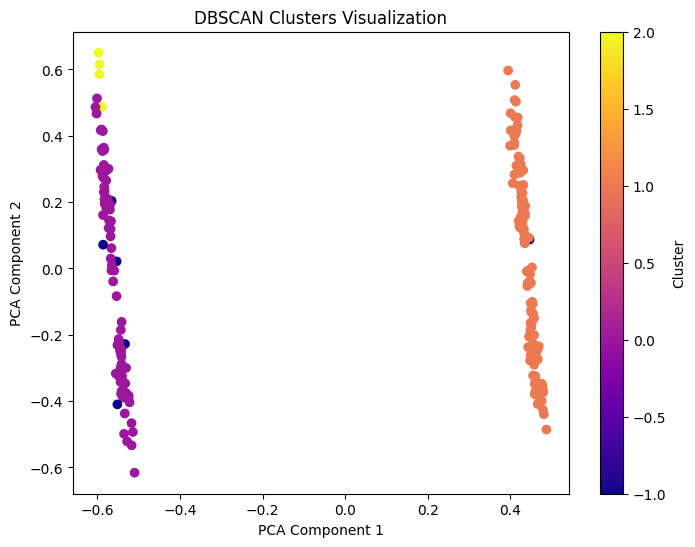

In [161]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['DBSCAN_Cluster'], cmap='plasma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [162]:
cluster_summary_dbscan = df.groupby('DBSCAN_Cluster').mean()
print(cluster_summary_dbscan)



print("GENRE  :   ",{'Male': 0, 'Female': 1})

                   Genre        Age  Annual Income (k$)  \
DBSCAN_Cluster                                            
-1              0.166667  28.833333           58.166667   
 0              0.000000  39.316456           63.822785   
 1              1.000000  38.261261           59.639640   
 2              0.000000  61.000000           25.250000   

                Spending Score (1-100)  
DBSCAN_Cluster                          
-1                           32.333333  
 0                           51.341772  
 1                           51.936937  
 2                            6.250000  
GENRE  :    {'Male': 0, 'Female': 1}


In [163]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Cluster
0,0,19,15,39,-1
1,0,21,15,81,0
2,1,20,16,6,-1
3,1,23,16,77,1
4,1,31,17,40,1
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,1
197,0,32,126,74,0
198,0,32,137,18,-1
